In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import h5py
import numpy as np

In [10]:
allDenoisedImages = sorted(glob("/scratch/mrphys/denoised/*"))

In [13]:
allDenoisedImages[40]

'/scratch/mrphys/denoised/denoised_M045.h5'

In [22]:
with h5py.File(allDenoisedImages[0],'r') as hf:
    prefix = 'C_000_0'
    imagestackReal = []
    imagestackImag = []
    for i in range(6):
        n = prefix + str(i).zfill(2)
        image = hf['Images'][n]
        imagestackReal.append(np.array(image['real']))
        imagestackImag.append(np.array(image['imag']))
        if i==0:
            normScale = np.max([np.abs(np.array(image['real'])).max(), np.abs(np.array(image['imag'])).max()])
    imagestackReal = np.array(imagestackReal)/normScale
    imagestackImag = np.array(imagestackImag)/normScale

In [26]:
imagestackReal.shape
imagestackReal

array([[[[ 0.00000000e+00,  0.00000000e+00, -2.02087449e-06, ...,
          -1.89244383e-06,  0.00000000e+00,  0.00000000e+00],
         [-1.85326257e-06,  2.98056477e-07,  3.39057237e-07, ...,
           6.49070898e-07, -7.83316310e-08,  3.85525652e-07],
         [-1.16786359e-05, -6.03906210e-06, -5.07907316e-06, ...,
           2.53867947e-05,  1.96739402e-05,  1.64711710e-05],
         ...,
         [-1.98765410e-05, -7.62623313e-06, -1.87134248e-07, ...,
           3.45360459e-05,  2.24618052e-05,  2.11872284e-05],
         [-2.39661085e-06,  4.26490914e-07,  4.64588175e-06, ...,
           5.75615240e-06,  1.55436999e-06,  2.01583020e-06],
         [-2.98524796e-08, -1.81667321e-08,  2.45613023e-06, ...,
           3.14760587e-06, -7.66599395e-10,  5.76490367e-09]],

        [[ 0.00000000e+00,  0.00000000e+00, -1.66169741e-06, ...,
          -1.29070042e-06,  0.00000000e+00,  0.00000000e+00],
         [-1.23527445e-06,  1.46649415e-06,  2.72474949e-06, ...,
           3.98550992e

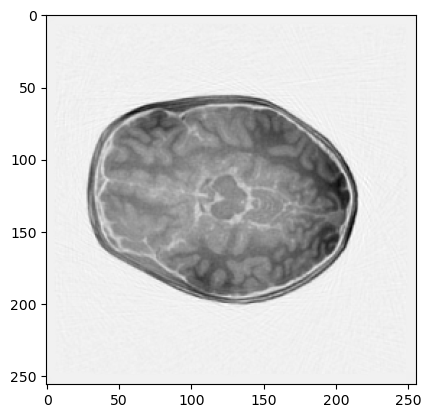

In [25]:
plt.gray()
plt.imshow(imagestackReal[0, 128])
plt.show()